<a href="https://colab.research.google.com/github/aslesani/pgmpy_fork/blob/master/src/default_test/imdb_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
def print_hello():
    print("hello")


In [0]:
import matplotlib.pyplot as plt

def plot_train_val_graph(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  print('epochs:' , epochs)
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()


In [0]:
def get_max_len_of_sequences(list_of_sequences):
  lengths = [len(list_of_sequences[i]) for i in range(len(list_of_sequences))]
  return max(lengths) , min(lengths) , lengths

In [0]:
def get_set_of_sensor_events(list_of_sequences):
 
  set_of_sensor_events = set()
  
  for i in range(len(list_of_sequences)):
      set_of_sensor_events = set_of_sensor_events.union(set(list_of_sequences[i]))
  
  return set_of_sensor_events, len(set_of_sensor_events)
  

In [6]:
ls

created_dataset/  pgmpy_fork/  sample_data/


In [7]:
!git clone https://github.com/aslesani/pgmpy_fork.git


Cloning into 'pgmpy_fork'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 893 (delta 56), reused 92 (delta 40), pack-reused 769
Receiving objects: 100% (893/893), 476.68 KiB | 7.57 MiB/s, done.
Resolving deltas: 100% (486/486), done.


In [32]:
ls

created_dataset/  pgmpy_fork/  sample_data/


In [8]:
!git clone https://github.com/aslesani/created_dataset.git

Cloning into 'created_dataset'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 87 (delta 74), reused 87 (delta 74), pack-reused 0
Unpacking objects: 100% (87/87), done.


In [0]:
#cd ..

In [33]:
ls created_dataset

'Seq of Bag of sensor events_based_on_activity_and_no_overlap_delta'/
'Seq of sensor events_based on activities'/
'Seq of sensor events_based_on_activity_and_no_overlap_delta'/
'Seq of sensor events_based_on_number_of_events'/
'Seq of sensor events_no overlap_based on different deltas'/


In [34]:
ls "created_dataset/Seq of sensor events_based on activities"

based_on_activities.csv


In [11]:
!ls

created_dataset  pgmpy_fork  sample_data


In [12]:
cd pgmpy_fork

/content/pgmpy_fork


In [13]:
ls

'pgmpy_fork - Shortcut.lnk'   src/


In [14]:
cd src

/content/pgmpy_fork/src


In [15]:
ls

default_test/


In [16]:
cd default_test

/content/pgmpy_fork/src/default_test


In [23]:
ls

created_dataset/  pgmpy_fork/  sample_data/


In [0]:
#! cd pgmpy_fork/src/default_test
#!ls
from  read_write import read_sequence_of_bags_CSV_file_with_activity, read_sequence_based_CSV_file_with_activity
address_to_read= r"created_dataset/Seq of sensor events_based on activities/based_on_activities.csv"
list_of_data , list_of_persons , _ = read_sequence_based_CSV_file_with_activity(file_address = address_to_read, has_header = True , separate_data_based_on_persons = False, separate_words= False)


In [13]:
ls

created_dataset/  pgmpy_fork/  sample_data/


In [0]:
max_seq_len, min_seq_len , lens = get_max_len_of_sequences(list_of_data)

In [26]:
print(max_seq_len, min_seq_len)

2216 1


In [62]:
print(lens)

[79, 102, 162, 1353, 167, 68, 488, 273, 271, 59, 48, 199, 219, 798, 310, 88, 19, 1561, 51, 274, 11, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 5, 34, 1, 5, 3, 1, 1, 15, 1, 1, 1, 12, 95, 165, 1076, 1, 3, 2, 1, 1, 1, 1, 2, 6, 1, 1, 3, 27, 1, 2, 1, 11, 2, 9, 1, 3, 1, 20, 1, 1, 2, 1, 1, 8, 2, 3, 2, 4, 2, 7, 1, 39, 2, 3, 3, 1, 1, 4, 1, 1, 1, 16, 4, 15, 2, 1, 1, 1, 1, 20, 2, 1, 1, 1, 1, 9, 3, 4, 1, 2, 1, 1, 2, 2, 4, 1, 6, 1, 1, 1, 1, 5, 3, 2, 2, 6, 2, 16, 3, 4, 1, 4, 2, 5, 2, 4, 1, 3, 3, 18, 1, 1, 1, 1, 2, 1, 2, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 1, 1, 2, 2, 1, 30, 1, 1, 1, 7, 1, 1, 2, 143, 1, 1, 2, 2, 1, 1, 2, 1, 7, 1, 1, 3, 6, 2, 4, 1, 1, 1, 3, 1, 1, 1, 5, 1, 1, 1, 3, 1, 1, 2, 1, 1, 14, 2, 2, 2, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 15, 1, 4, 1, 3, 2, 1, 2, 3, 6, 2, 1, 1, 2, 2, 2, 3, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 3, 2, 2, 1, 4, 6, 2, 1, 4, 30, 3, 4, 1, 1, 1, 1, 1, 3, 6, 1, 2, 3, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 

In [0]:
sensor_events , number_of_events = get_set_of_sensor_events(list_of_data)

In [29]:
print(sorted(sensor_events))

['D03_off', 'D03_on', 'D05_on', 'D07_off', 'D07_on', 'D08_off', 'D08_on', 'D09_off', 'D09_on', 'D10_off', 'D10_on', 'D12_off', 'D12_on', 'D14_off', 'D14_on', 'D15_off', 'D15_on', 'I03_off', 'I03_on', 'M01_off', 'M01_on', 'M02_off', 'M02_on', 'M03_off', 'M03_on', 'M04_off', 'M04_on', 'M05_off', 'M05_on', 'M06_off', 'M06_on', 'M07_off', 'M07_on', 'M08_off', 'M08_on', 'M09_off', 'M09_on', 'M10_off', 'M10_on', 'M11_off', 'M11_on', 'M12_off', 'M12_on', 'M13_off', 'M13_on', 'M14_off', 'M14_on', 'M15_off', 'M15_on', 'M16_off', 'M16_on', 'M17_off', 'M17_on', 'M18_off', 'M18_on', 'M19_off', 'M19_on', 'M20_off', 'M20_on', 'M21_off', 'M21_on', 'M22_off', 'M22_on', 'M23_off', 'M23_on', 'M24_off', 'M24_on', 'M25_off', 'M25_on', 'M26_off', 'M26_on', 'M27_off', 'M27_on', 'M28_off', 'M28_on', 'M29_off', 'M29_on', 'M30_off', 'M30_on', 'M31_off', 'M31_on', 'M32_off', 'M32_on', 'M33_off', 'M33_on', 'M34_off', 'M34_on', 'M35_off', 'M35_on', 'M36_off', 'M36_on', 'M37_off', 'M37_on', 'M38_off', 'M38_on', 'M

In [54]:
print(type(list_of_data[0][0]))

<class 'str'>


In [53]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = number_of_events, filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~')
list_of_data = [r'salam man', r"'M38_off' , 'M38_on'"]
tokenizer.fit_on_texts(list_of_data)
seqs = tokenizer.texts_to_sequences(list_of_data)
print(seqs)


[[1, 2], [3, 4]]


None


In [0]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('before apply pad_sequence, x_train[0]:' , x_train[0])

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
before apply pad_sequence, x_train[0]: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 1

In [0]:
print(x_train[0])

[   15   256     4     2     7  3766     5   723    36    71    43   530
   476    26   400   317    46     7     4 12118  1029    13   104    88
     4   381    15   297    98    32  2071    56    26   141     6   194
  7486    18     4   226    22    21   134   476    26   480     5   144
    30  5535    18    51    36    28   224    92    25   104     4   226
    65    16    38  1334    88    12    16   283     5    16  4472   113
   103    32    15    16  5345    19   178    32]


In [0]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)# i think score is loss value
print('Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 160s 6ms/step - loss: 0.4603 - acc: 0.7816 - val_loss: 0.4377 - val_acc: 0.8022
Epoch 2/5
25000/25000 [==============================] - 159s 6ms/step - loss: 0.3028 - acc: 0.8764 - val_loss: 0.3759 - val_acc: 0.8344
Epoch 3/5
25000/25000 [==============================] - 159s 6ms/step - loss: 0.2229 - acc: 0.9121 - val_loss: 0.4648 - val_acc: 0.8110
Epoch 4/5
25000/25000 [==============================] - 161s 6ms/step - loss: 0.1566 - acc: 0.9412 - val_loss: 0.4598 - val_acc: 0.8304
Epoch 5/5
25000/25000 [==============================] - 26s 1ms/step
Test score: 0.6907526717042923
Test accuracy: 0.8174


In [0]:
print(type(score) , type(acc))

epochs: range(1, 6)


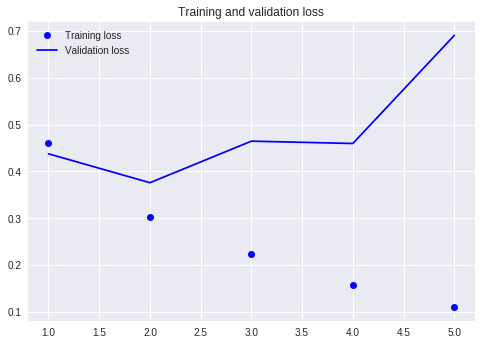

In [0]:
plot_train_val_graph(history)